In [ ]:
#solution 1

In [1]:
import pandas as pd

file_path = "D:\happiness_score_dataset.csv"  
data = pd.read_csv(file_path)
print(data.head())


       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938           

In [2]:
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

data_types = data.dtypes
print("Data types:\n", data_types)


Missing values:
 Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64
Data types:
 Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object


In [3]:
summary_stats = data.describe()
print("Summary statistics:\n", summary_stats)

correlation_matrix = data.corr()
print("Correlation matrix:\n", correlation_matrix)


Summary statistics:
        Happiness Rank  Happiness Score  Standard Error  \
count      158.000000       158.000000      158.000000   
mean        79.493671         5.375734        0.047885   
std         45.754363         1.145010        0.017146   
min          1.000000         2.839000        0.018480   
25%         40.250000         4.526000        0.037268   
50%         79.500000         5.232500        0.043940   
75%        118.750000         6.243750        0.052300   
max        158.000000         7.587000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                158.000000  158.000000                158.000000   
mean                   0.846137    0.991046                  0.630259   
std                    0.403121    0.272369                  0.247078   
min                    0.000000    0.000000                  0.000000   
25%                    0.545808    0.856823                  0.439185   
50%               

C:\Users\abhij\AppData\Local\Temp\ipykernel_2788\2063967029.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


Correlation matrix:
                                Happiness Rank  Happiness Score  \
Happiness Rank                       1.000000        -0.992105   
Happiness Score                     -0.992105         1.000000   
Standard Error                       0.158516        -0.177254   
Economy (GDP per Capita)            -0.785267         0.780966   
Family                              -0.733644         0.740605   
Health (Life Expectancy)            -0.735613         0.724200   
Freedom                             -0.556886         0.568211   
Trust (Government Corruption)       -0.372315         0.395199   
Generosity                          -0.160142         0.180319   
Dystopia Residual                   -0.521999         0.530474   

                               Standard Error  Economy (GDP per Capita)  \
Happiness Rank                       0.158516                 -0.785267   
Happiness Score                     -0.177254                  0.780966   
Standard Error             

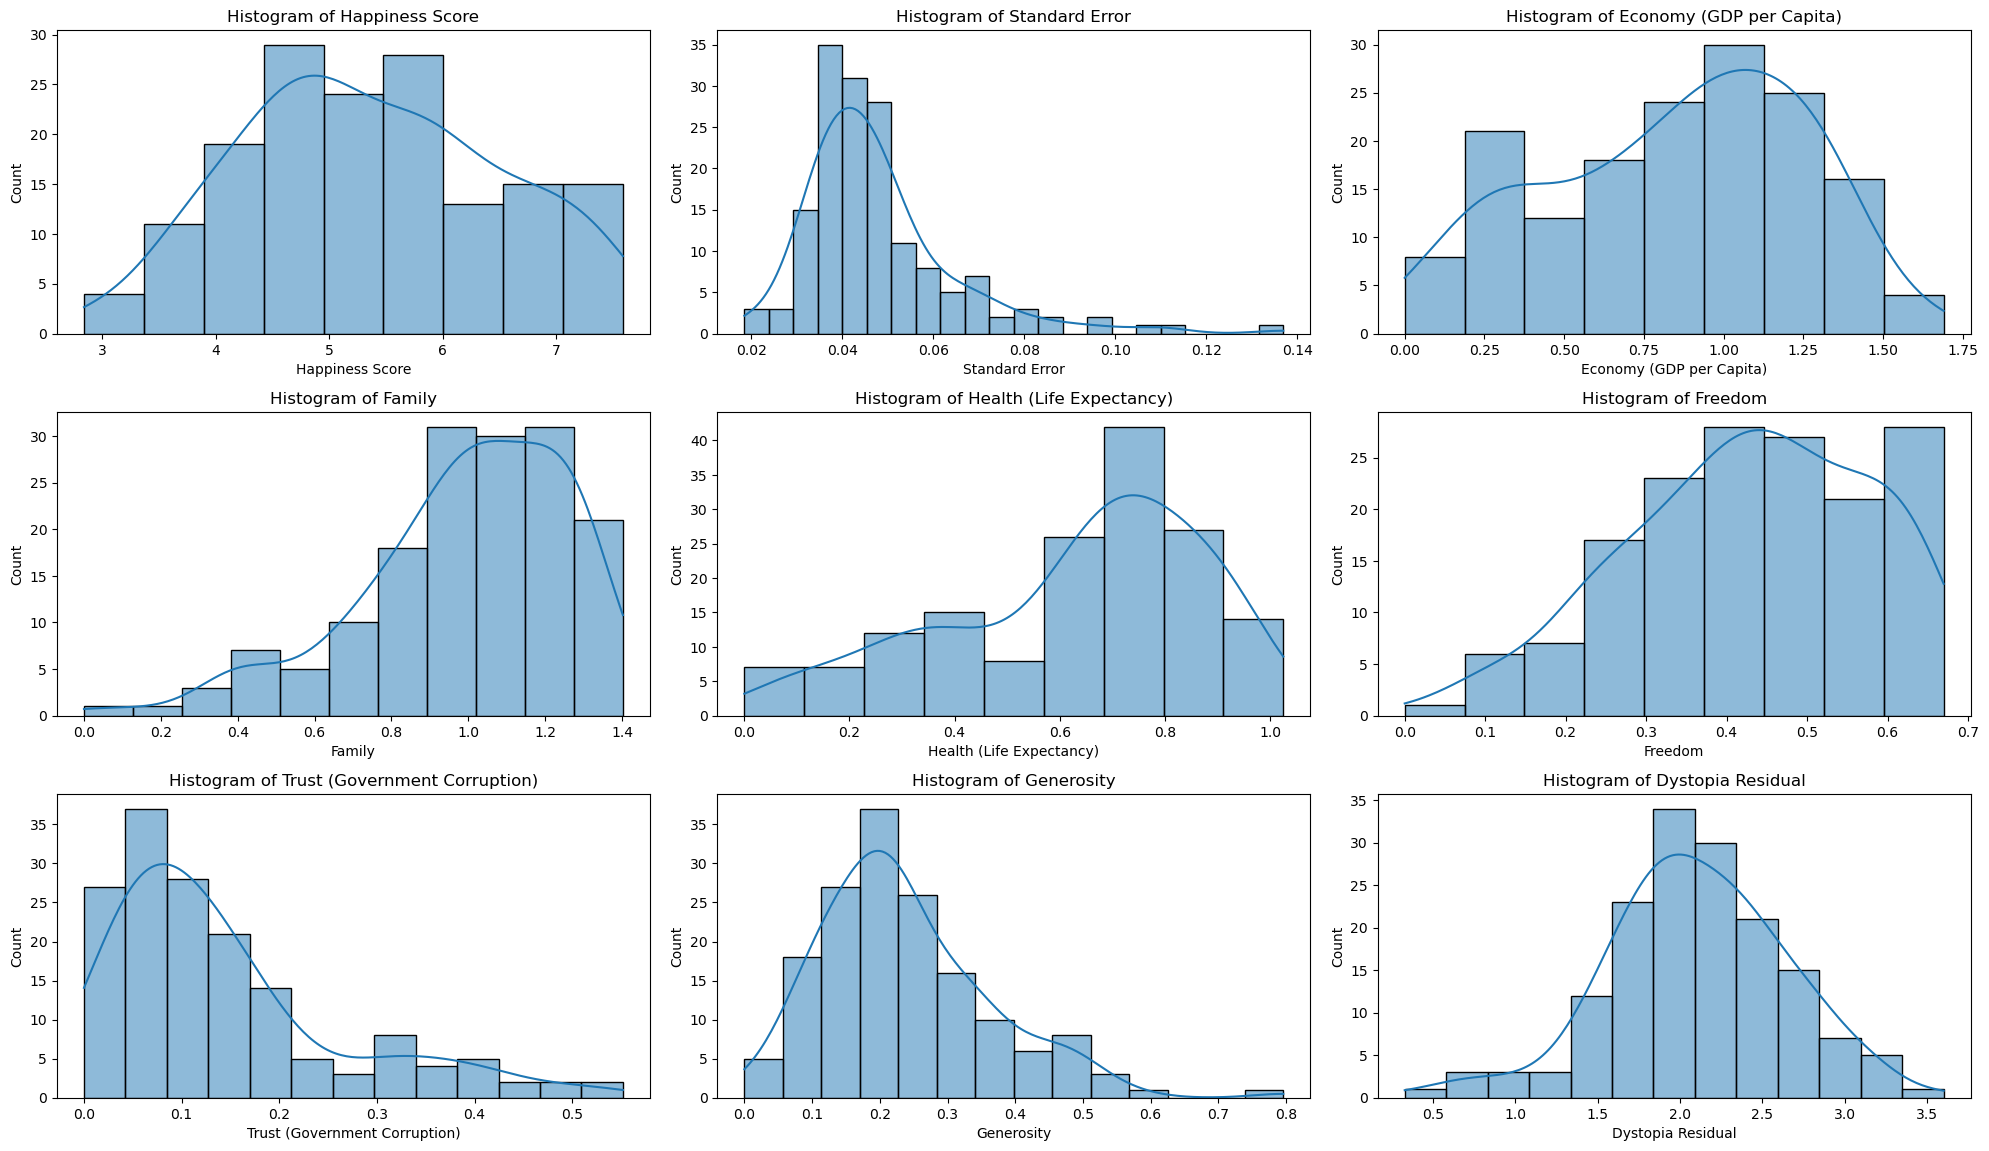

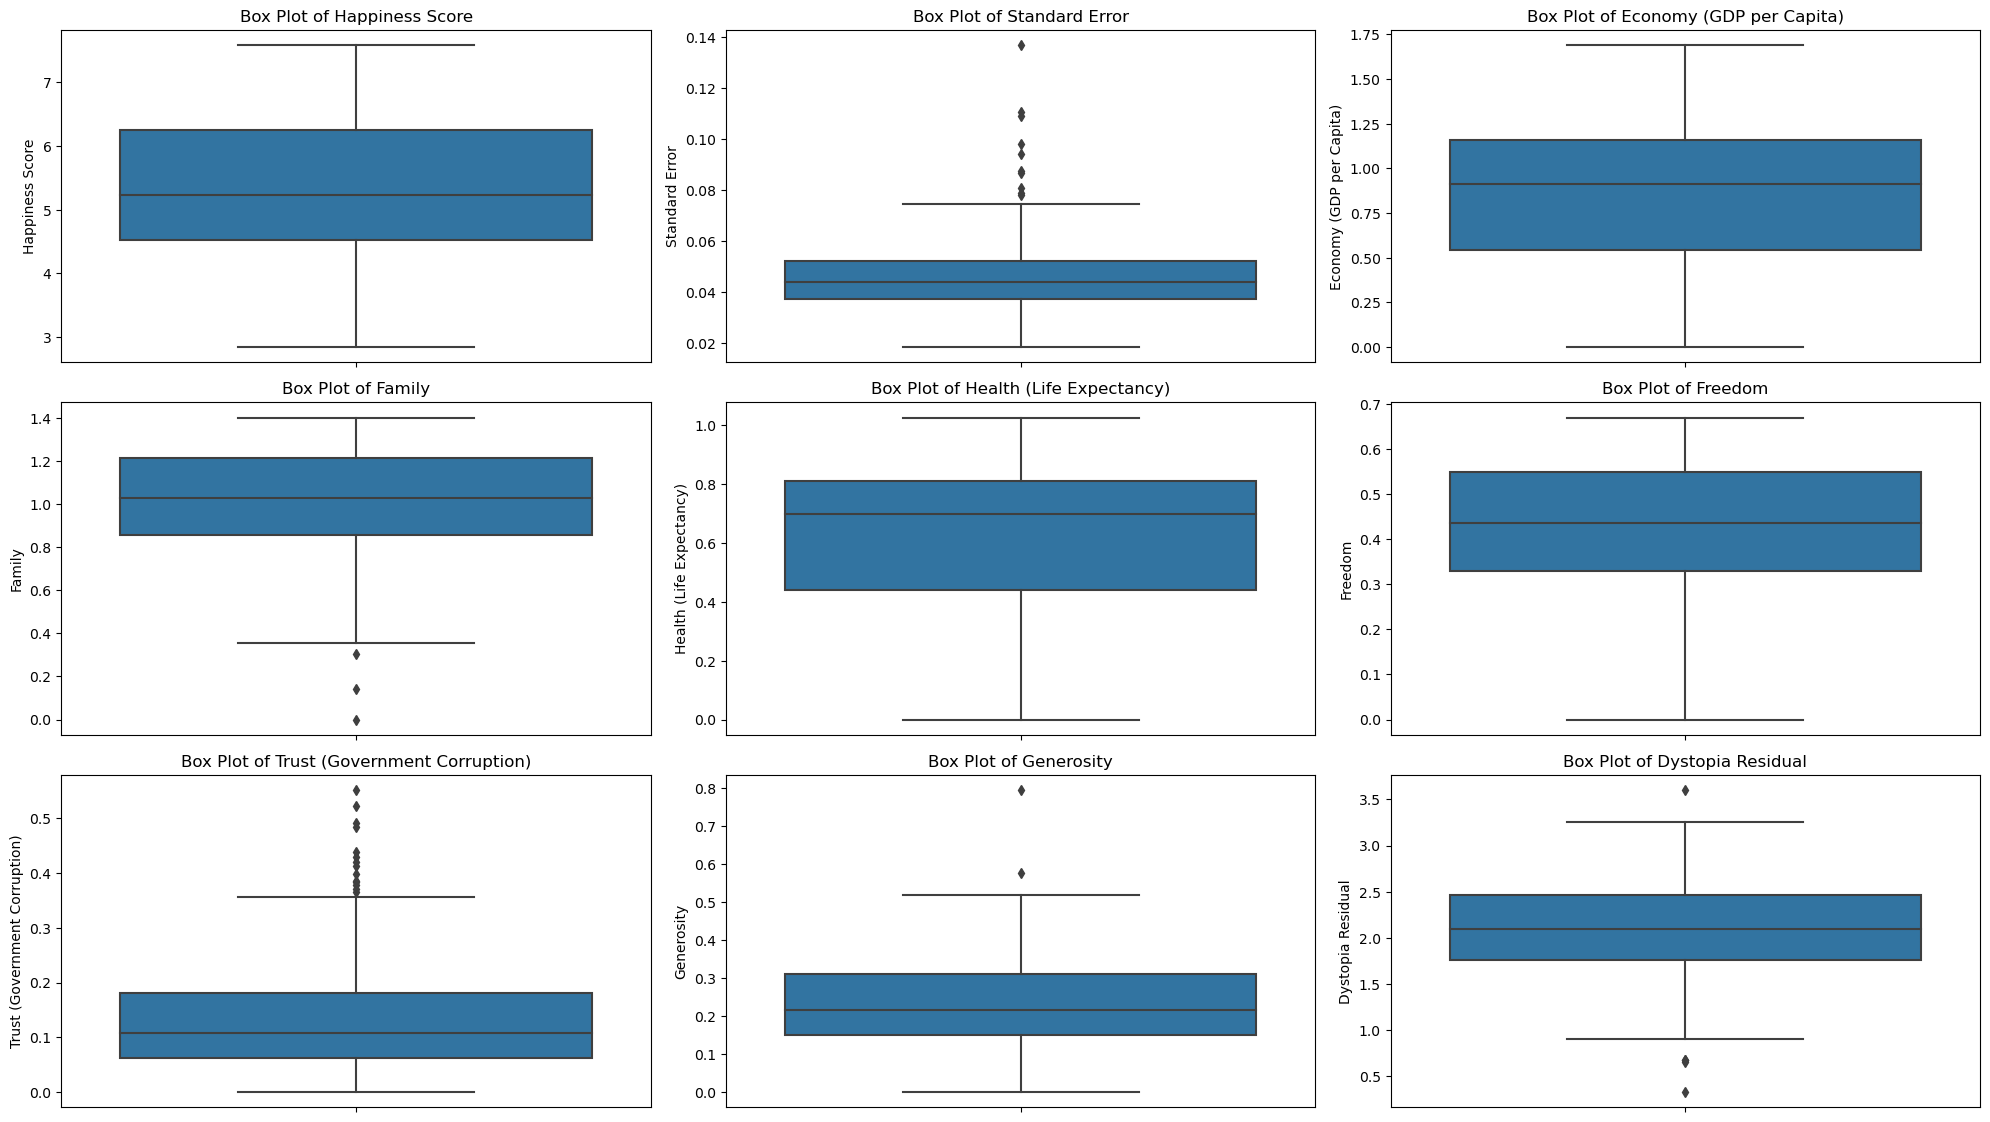

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))

for i, column in enumerate(data.columns[3:], 1):
    plt.subplot(4, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')
    
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 15))
for i, column in enumerate(data.columns[3:], 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=data[column])
    plt.title(f'Box Plot of {column}')
    
plt.tight_layout()
plt.show()


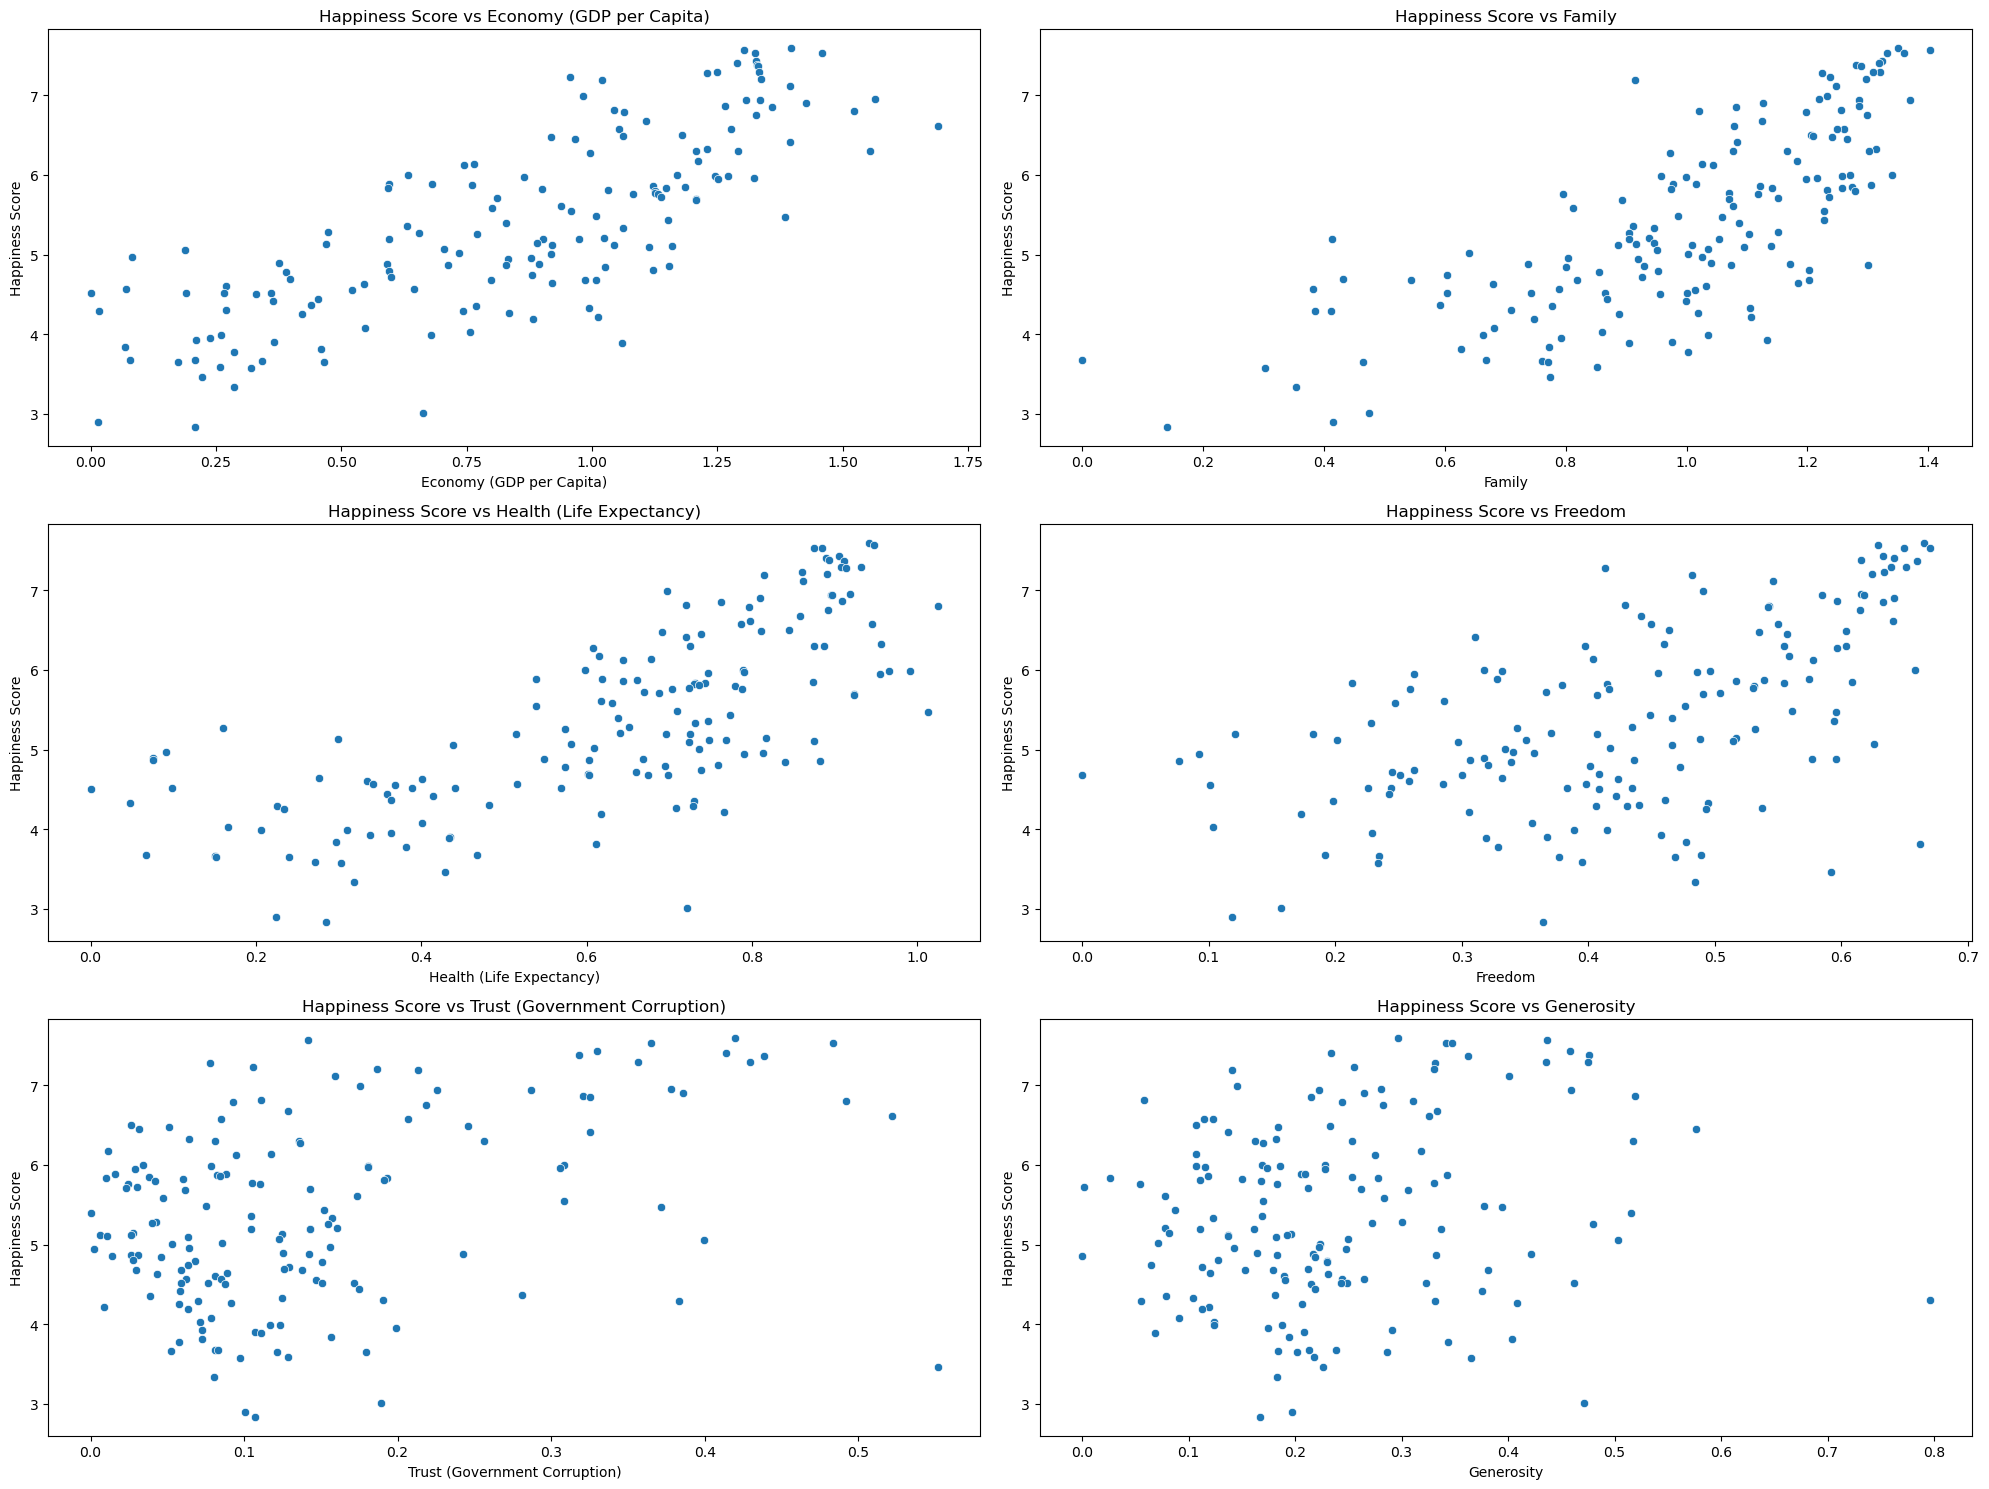

In [6]:
plt.figure(figsize=(20, 15))

predictors = [
    'Economy (GDP per Capita)', 
    'Family', 
    'Health (Life Expectancy)', 
    'Freedom', 
    'Trust (Government Corruption)', 
    'Generosity'
]

for i, column in enumerate(predictors, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=data[column], y=data['Happiness Score'])
    plt.title(f'Happiness Score vs {column}')
    plt.xlabel(column)
    plt.ylabel('Happiness Score')
    
plt.tight_layout()
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

X = data[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)']]
y = data['Happiness Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'R2': r2}

for model_name, metrics in results.items():
    print(f"{model_name}: MSE = {metrics['MSE']}, R2 = {metrics['R2']}")


Linear Regression: MSE = 0.24193882833563726, R2 = 0.8294705100069294
Ridge Regression: MSE = 0.25106024919608405, R2 = 0.8230413177270268
Lasso Regression: MSE = 1.4260115536344167, R2 = -0.005117800389395466
Random Forest: MSE = 0.30496339566875036, R2 = 0.7850479284879355
Gradient Boosting: MSE = 0.3388987712179858, R2 = 0.7611287323632595


In [10]:
best_model = models['Linear Regression']
coefficients = pd.DataFrame(best_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


                               Coefficient
Economy (GDP per Capita)          0.876149
Family                            1.261558
Health (Life Expectancy)          1.019769
Freedom                           1.231449
Generosity                        0.635959
Trust (Government Corruption)     0.811955


In [11]:
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Final Model: MSE = {mse}, R2 = {r2}")


Final Model: MSE = 0.24193882833563726, R2 = 0.8294705100069294


In [ ]:
# solution 2

In [14]:
import pandas as pd

file_path = "D:\\titanic_train.csv"
data = pd.read_csv(file_path)

print(data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [15]:
print(data.isnull().sum())

data['Age'].fillna(data['Age'].median(), inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['Cabin'].fillna('Unknown', inplace=True)

data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

print(data.dtypes)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object


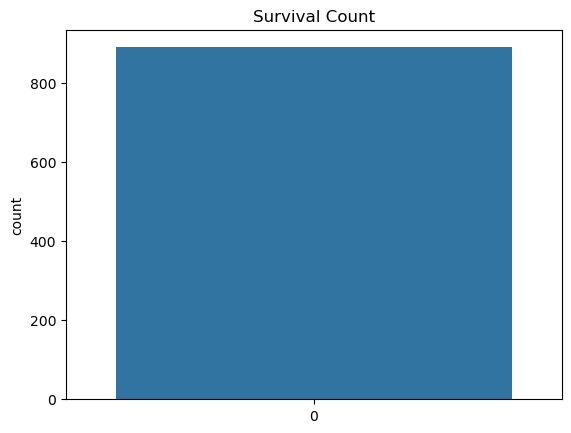

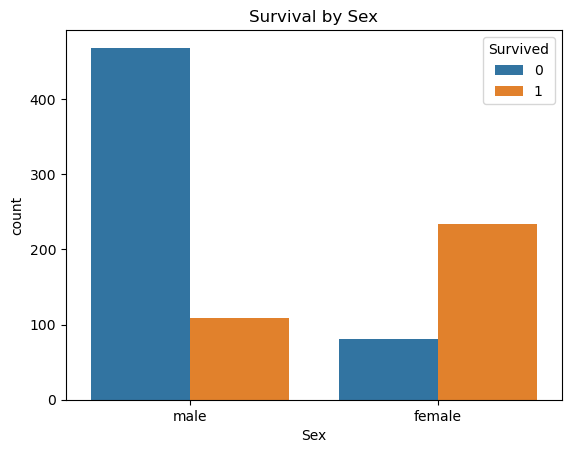

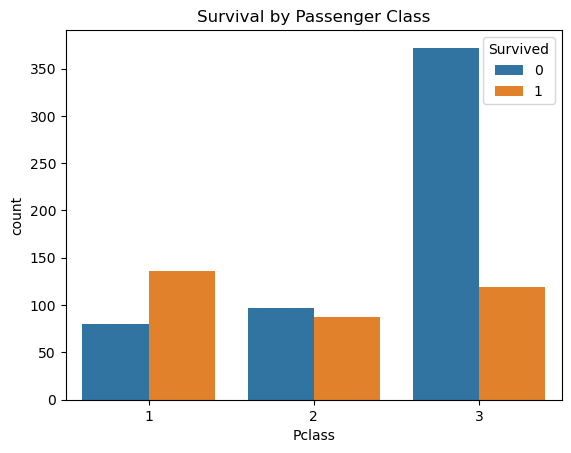

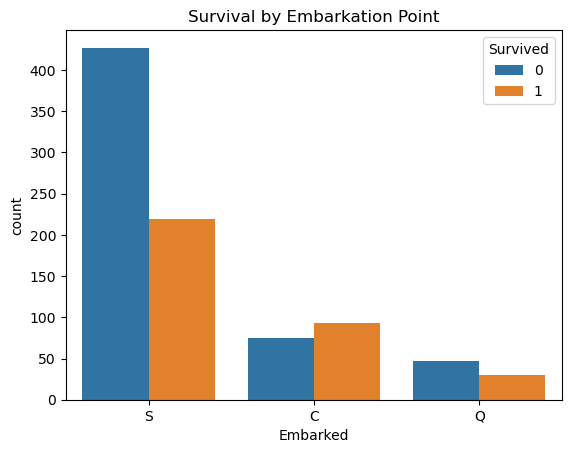

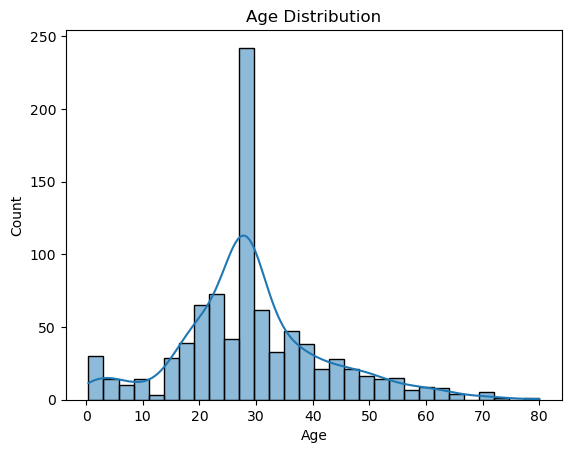

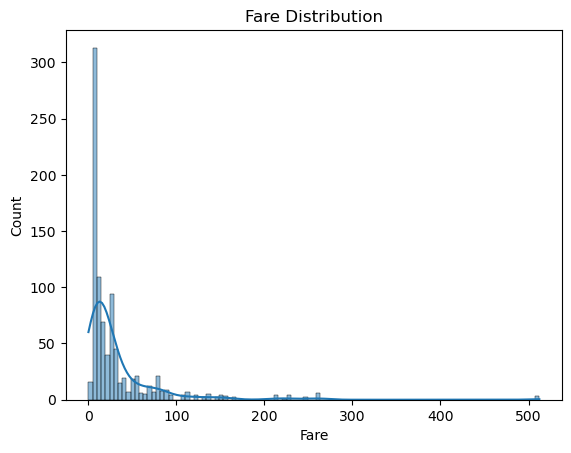

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data['Survived'])
plt.title('Survival Count')
plt.show()

sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Survival by Sex')
plt.show()

sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survival by Passenger Class')
plt.show()

sns.countplot(x='Embarked', hue='Survived', data=data)
plt.title('Survival by Embarkation Point')
plt.show()

sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

sns.histplot(data['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()


In [ ]:
#solution 2 with accuracy

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [37]:
file_path = "D:\\titanic_train.csv"

titanic_data = pd.read_csv(file_path)


In [38]:
print(titanic_data.head())

print(titanic_data.isnull().sum())

titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Pa

In [39]:
X = titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'], axis=1)
y = titanic_data['Survived']


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [42]:
model = LogisticRegression()

model.fit(X_train_scaled, y_train)


LogisticRegression()

In [43]:
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Accuracy: 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



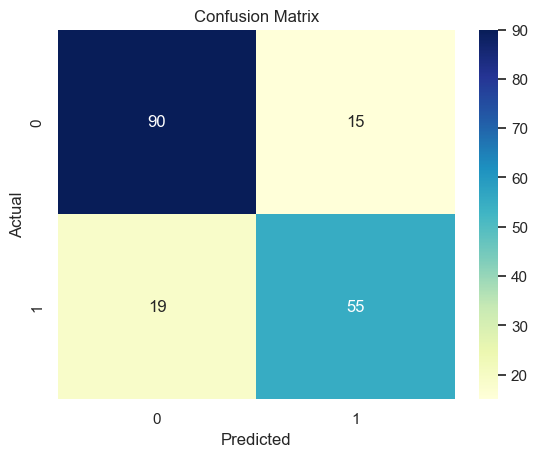

In [44]:
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
